### This notebook contains the scripts to visualise the features used to train Neural Networks for segmentation

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import rasterio
from rasterio.plot import show
from pathlib import Path
import shutil
import pandas as pd  
import richdem as rd

In [14]:
# Root Directory
Image_Segmentation_Path = 'MarsData/'
# Inputs/Sources
dataframes_path = Image_Segmentation_Path + "DataFrames/"
dataset_dirs_path = dataframes_path + 'three_channel_dataset.csv'

In [15]:
# helper function for data visualization
def visualize(**images):
    """PLot images in one row."""
    n = len(images)
    plt.figure(figsize=(16, 5))
    for i, (name, image) in enumerate(images.items()):
        plt.subplot(1, n, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.title(' '.join(name.split('_')).title())
        plt.imshow(image)
    plt.show()

In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [17]:
from torch.utils.data import DataLoader
from torch.utils.data import Dataset as BaseDataset
from torch import FloatTensor

In [29]:
class Dataset(BaseDataset):    
    CLASSES = ['non-mound', 'mound']
    
    def __init__(
          self, 
          dirs):
        self.df = pd.read_csv(dirs)
        self.ids = self.df.index.to_list()

        # convert str names to class values on masks
        self.class_values = CLASSES = [0, 1]
    
    def __getitem__(self, i):
        # read data
        if self.df.at[i, 'origin'][-3:] == 'tif':
            with rasterio.open(self.df.at[i, 'origin'].replace('/content/drive/My Drive/Image Segmentation/Resized Sets','MarsData')) as dem:
                dem_array = dem.read(1)

            with rasterio.open(self.df.at[i, 'hillshade'].replace('/content/drive/My Drive/Image Segmentation/Resized Sets','MarsData')) as hillshade:
                hillshade_array = hillshade.read(1)

            with rasterio.open(self.df.at[i, 'slope'].replace('/content/drive/My Drive/Image Segmentation/Resized Sets','MarsData')) as slope:
                slope_array = slope.read(1)

            with rasterio.open(self.df.at[i, 'mask'].replace('/content/drive/My Drive/Image Segmentation/Resized Sets','MarsData')) as mask:
                mask_array = mask.read(1)
                
            mask_array = np.where(mask_array == 0.5, 0, mask_array)                        
        return dem_array, hillshade_array, slope_array, mask_array
      
    def __len__(self):
        return len(self.ids)

In [30]:
df = pd.read_csv(dataset_dirs_path)

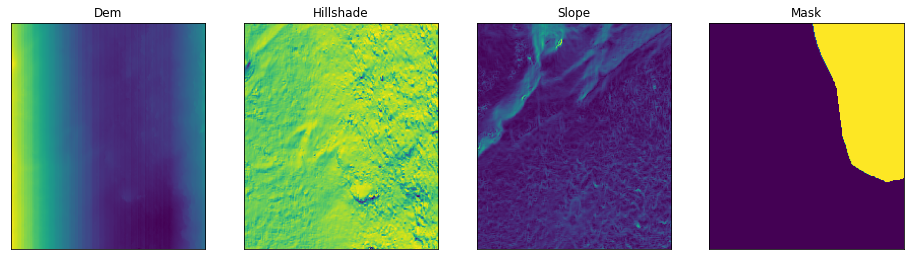

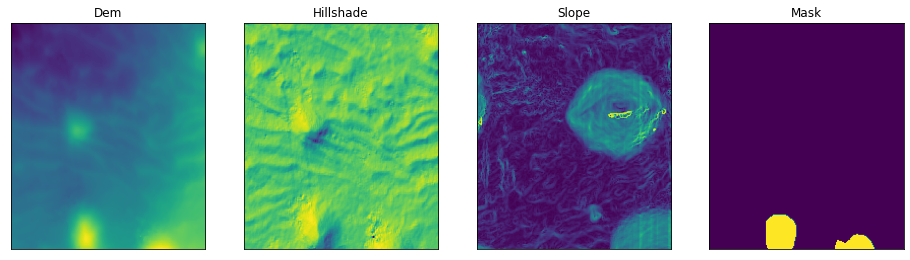

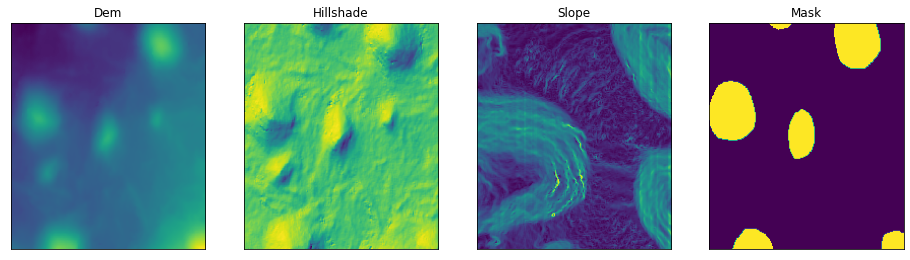

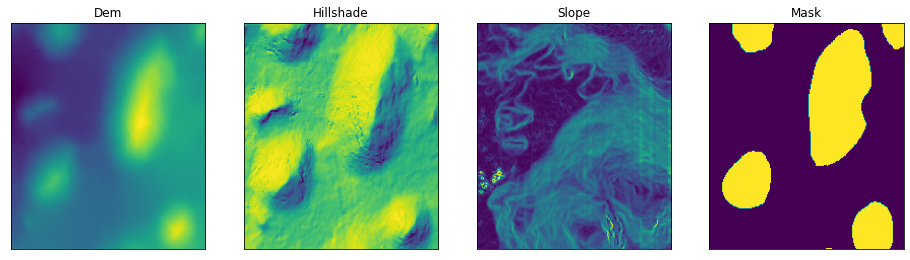

In [31]:
### plot sample outputs
idx = [303, 478, 479, 450]
for i in idx:
    dataset = Dataset(dataset_dirs_path)
    dem_array, hillshade_array, slope_array, mask_array = dataset[i]
    visualize(
        dem=dem_array,
        hillshade=hillshade_array,
        slope=slope_array,
        mask=mask_array,
    )